In [1]:
library(forecast)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Aggregated TS

In [2]:
df_eu  <-  read.csv(file="hts_eu_a10.csv", header=TRUE, sep=",", row.names =1 )

In [3]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = 4, start = 2000) 

In [4]:
gdp_agg  <-  gdp_agg/1000
df_eu  <-  df_eu/1000

#### Sliding window

In [11]:
ac <- c()
l <- list()

In [12]:
for (i in 0:4){
    st_year  <-  2000 + i
    train_start  <- st_year
    train_end  <- st_year + 0.25*51
    test_start  <- st_year + 0.25*(51+1) 
    test_end  <-  st_year + 0.25*(51+8)
    
    print(c(train_start, train_end, test_start, test_end))
    
    if (i == 0){
        train <- window(gdp_agg, end=train_end)}
    else{
        train <- window(gdp_agg, start=train_start, end=train_end)
    }
    
    if (i == 4){
        test <- window(gdp_agg, start=test_start)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }
        
    gdp_arima  <- forecast(Arima(train, order=c(3,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.mean = TRUE), h = 8  )
    l[[i+1]]  <-   gdp_arima
    ac  <-  c(ac, accuracy(gdp_arima, test)[2, 2])
    
    }

[1] 2000.00 2012.75 2013.00 2014.75
[1] 2001.00 2013.75 2014.00 2015.75
[1] 2002.00 2014.75 2015.00 2016.75
[1] 2003.00 2015.75 2016.00 2017.75
[1] 2004.00 2016.75 2017.00 2018.75


In [6]:
ac * 1000

[1] 30004.50 70819.46 65892.64 71879.66 62743.83

In [7]:
mean(ac * 1000)

[1] 60268.02

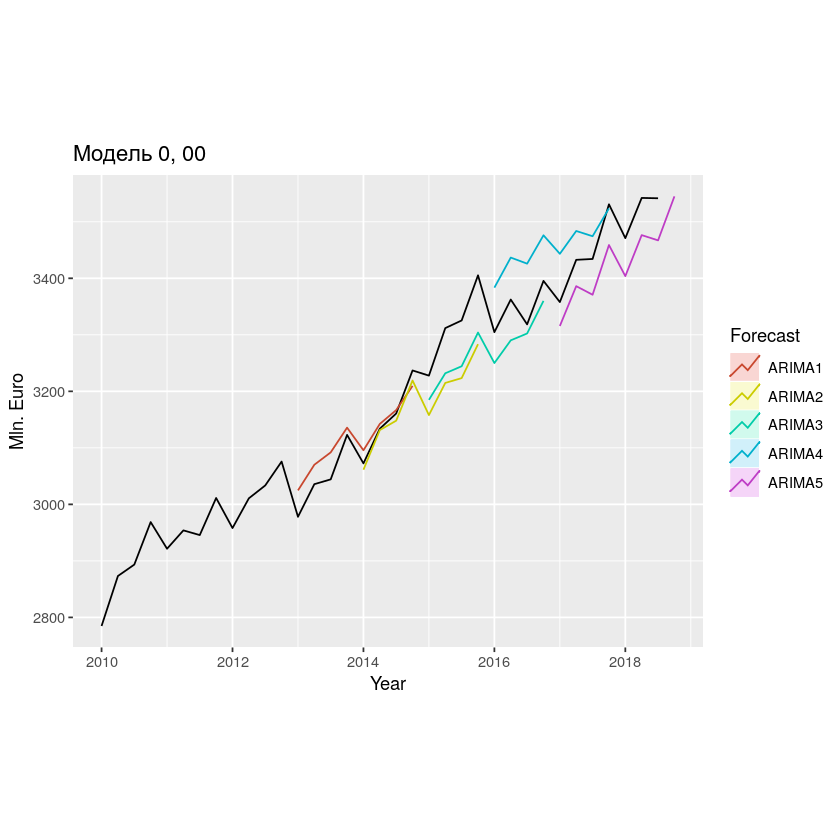

In [21]:
autoplot(window(gdp_agg, start=2010))+
    autolayer(l[[1]], series="ARIMA1", PI=FALSE) +
    autolayer(l[[2]], series="ARIMA2", PI=FALSE) +
    autolayer(l[[3]], series="ARIMA3", PI=FALSE) +
    autolayer(l[[4]], series="ARIMA4", PI=FALSE) +
    autolayer(l[[5]], series="ARIMA5", PI=FALSE) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("Модель 0, 00") +
    guides(colour=guide_legend(title="Forecast")) +
    theme(aspect.ratio = 0.75)

#### Growing window

In [57]:
per  <-  4
# ac <- c()
m_top  <- l_top <- list()
df_ac  <-  data.frame(matrix(ncol = 0, nrow = 0))

In [52]:
for (i in 0:per){
    st_year  <-  2000 + i
    train_start  <- st_year
    train_end  <- st_year + 0.25*51
    test_start  <- st_year + 0.25*(51+1) 
    test_end  <-  st_year + 0.25*(51+8)
    
    print(c(train_start, train_end, test_start, test_end))
    
    train <- window(gdp_agg, end=train_end)
    
    if (i == 4){
        test <- window(gdp_agg, start=test_start)}
    else{
        test <- window(gdp_agg, start=test_start, end=test_end)
    }
    
    m_top  <- 
    
    gdp_arima  <- forecast(Arima(train, order=c(3,0,0), seasonal=c(2,0,0), include.drift = TRUE, include.mean = TRUE), h = 8  )
    
    l[[i+1]]  <-   gdp_arima
#     ac  <-  c(ac, accuracy(gdp_arima, test)[2, 2])
    df_ac  <-  bind_rows(df_ac, accuracy(gdp_arima, test)[2, c(2,5,7,8)]) 
    }

[1] 2000.00 2012.75 2013.00 2014.75
[1] 2001.00 2013.75 2014.00 2015.75
[1] 2002.00 2014.75 2015.00 2016.75
[1] 2003.00 2015.75 2016.00 2017.75
[1] 2004.00 2016.75 2017.00 2018.75


In [53]:
df_ac

RMSE,MAPE,ACF1,Theil's U
30.00450,0.8423452,0.3147106,0.4774273
70.35219,1.6318005,0.6839184,1.2522039
63.19442,1.7068541,0.2837959,0.9335619
71.40787,1.9332753,0.3711943,1.1356505
55.14303,1.5573230,0.4297768,0.9073770


In [55]:
colMeans(df_ac)

RMSE       MAPE       ACF1  Theil's U 
58.0204039  1.5343196  0.4166792  0.9412441

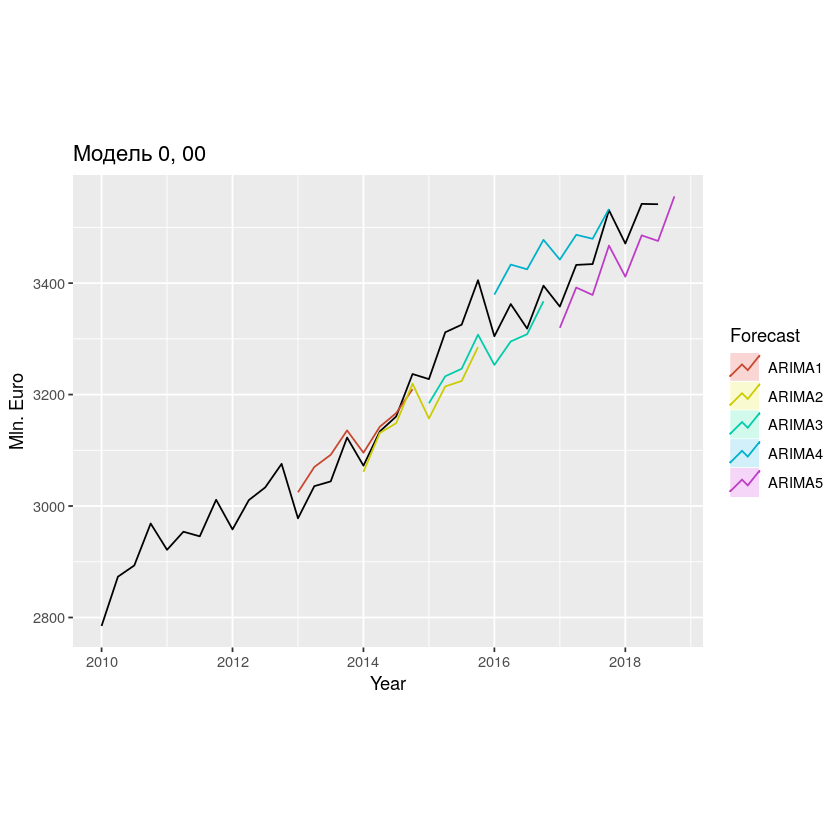

In [56]:
autoplot(window(gdp_agg, start=2010))+
    autolayer(l[[1]], series="ARIMA1", PI=FALSE) +
    autolayer(l[[2]], series="ARIMA2", PI=FALSE) +
    autolayer(l[[3]], series="ARIMA3", PI=FALSE) +
    autolayer(l[[4]], series="ARIMA4", PI=FALSE) +
    autolayer(l[[5]], series="ARIMA5", PI=FALSE) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("Модель 0, 00") +
    guides(colour=guide_legend(title="Forecast")) +
    theme(aspect.ratio = 0.75)